It takes a lot of manual effort to complete the evaluation process as even one college may contain thousands of students.

### In this Data Science Project we will evaluate the Performance of a student using Machine Learning techniques and python.

### Let’s start with importing the libraries & data:

In [40]:
# for some basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Student Marks Performance Analysis & Prediction with Machine Learning\StudentsPerformance.csv')

# getting the shape of the data
print(data.shape)

(1000, 13)


### Data Cleaning

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [42]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [43]:
df=df.rename(columns={'parental level of education':'parental_level_of_education',
                      'test preparation course':'test_preparation_course',
                     'math score':'math_score','reading score':'reading_score','writing score':'writing_score'})
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [44]:
df=df.replace(['group A','group B','group C','group D','group E'],[0,1,2,3,4])
df=df.replace(["bachelor's degree", 'some college', "master's degree","associate's degree", 'high school', 'some high school'],
             [0,1,2,3,4,5])
df=df.replace(['standard', 'free/reduced'],[0,1])
df=df.replace(['none', 'completed'],[0,1])
df=df.replace(['male','female'],[0,1])
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,1,1,0,0,0,72,72,74
1,1,2,1,0,1,69,90,88
2,1,1,2,0,0,90,95,93
3,0,0,3,1,0,47,57,44
4,0,2,1,0,0,76,78,75


In [45]:
df['total_score']=(df['math_score']+df['reading_score']+df['writing_score'])/3 
df['total_score']=df['total_score'].astype(int)
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,1,1,0,0,0,72,72,74,72
1,1,2,1,0,1,69,90,88,82
2,1,1,2,0,0,90,95,93,92
3,0,0,3,1,0,47,57,44,49
4,0,2,1,0,0,76,78,75,76


### Data Visualization

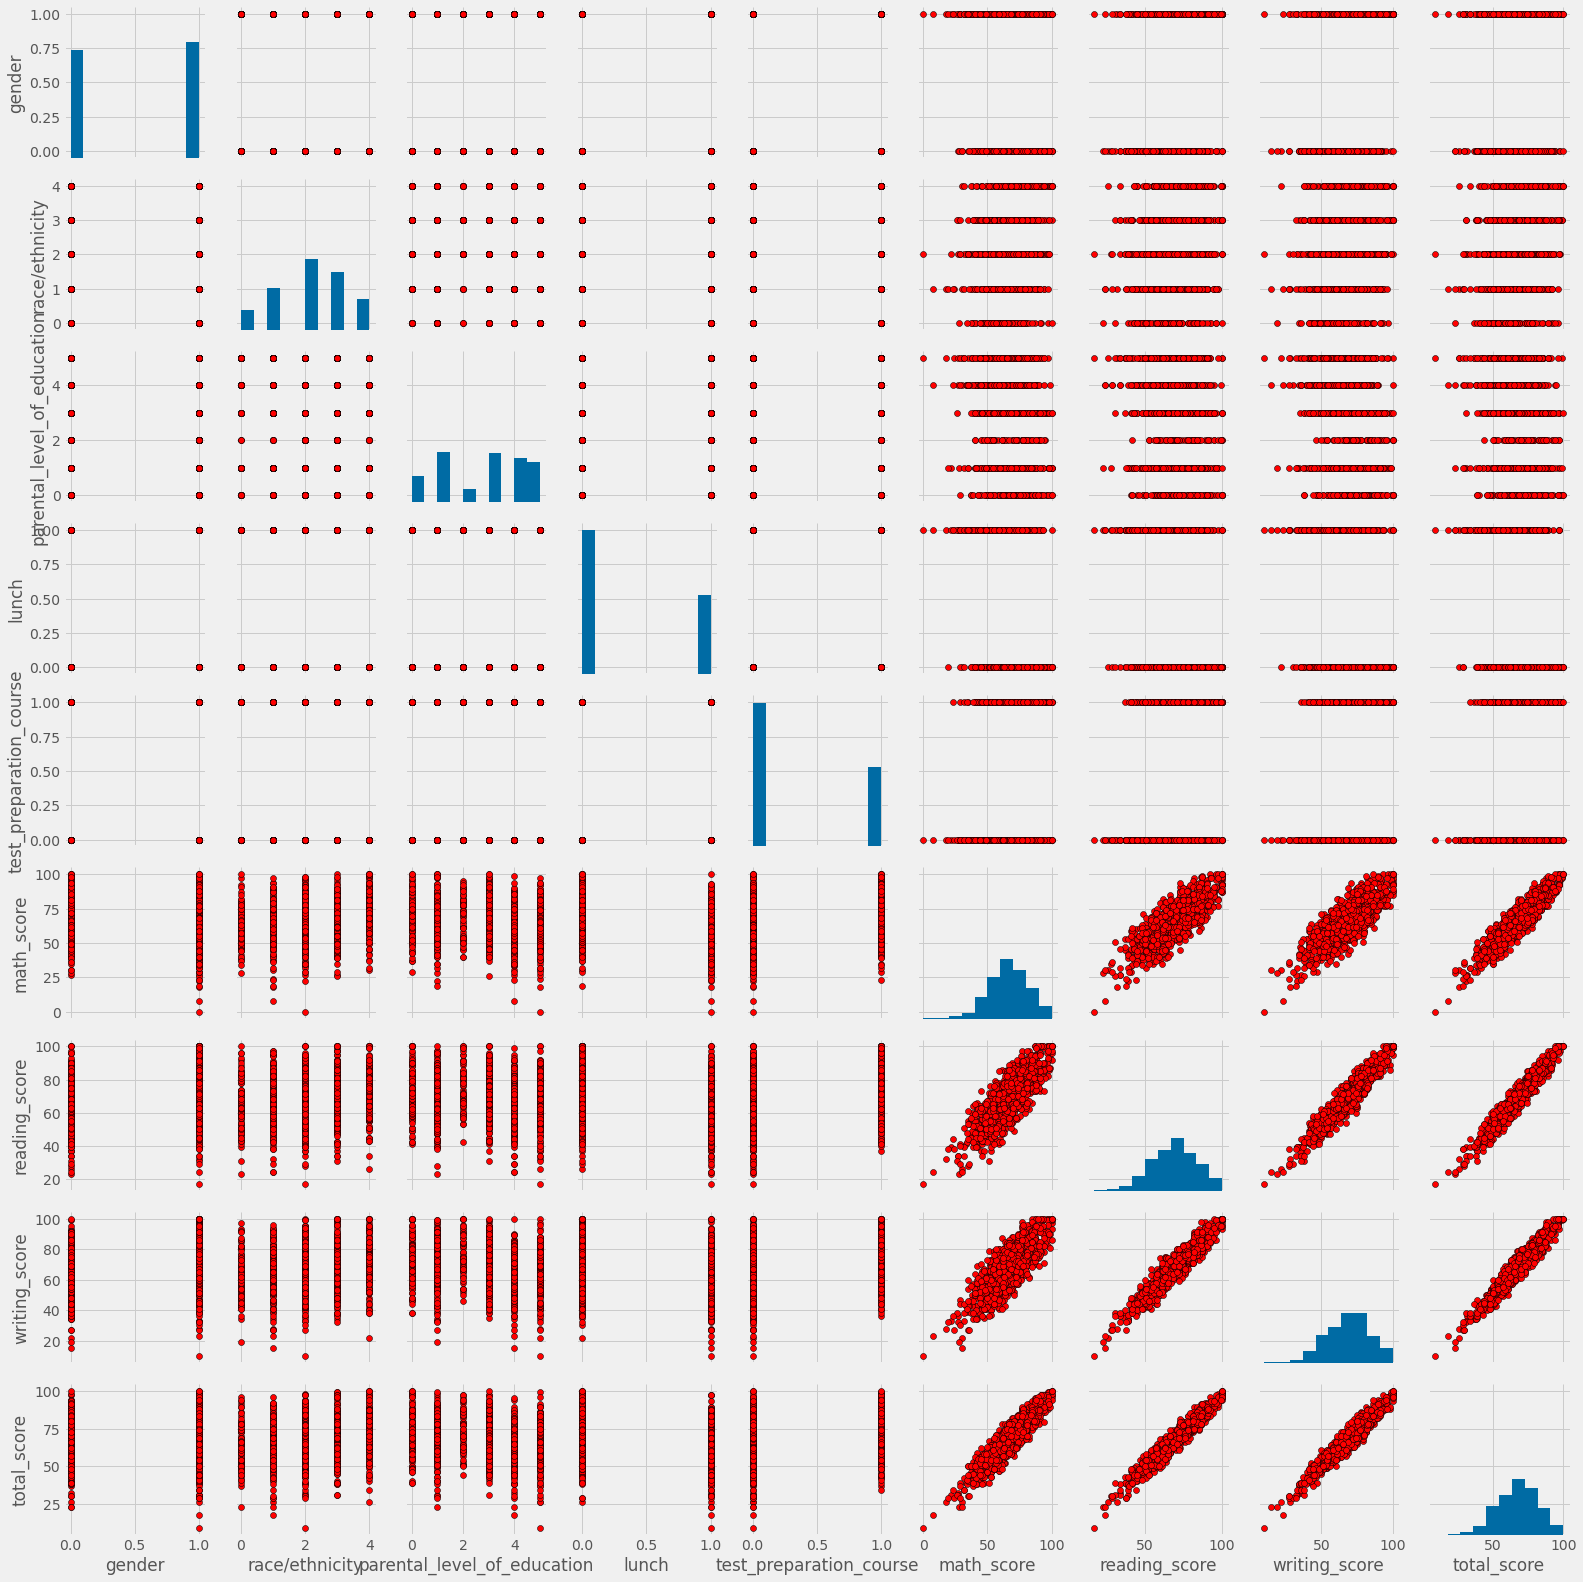

In [46]:
x=sns.PairGrid(df,palette='coolwarm')
x=x.map_diag(plt.hist)
x=x.map_offdiag(plt.scatter,color='red',edgecolor='black')

The above plot descibes about the importance of different features and its effect on other features

<AxesSubplot:xlabel='gender', ylabel='total_score'>

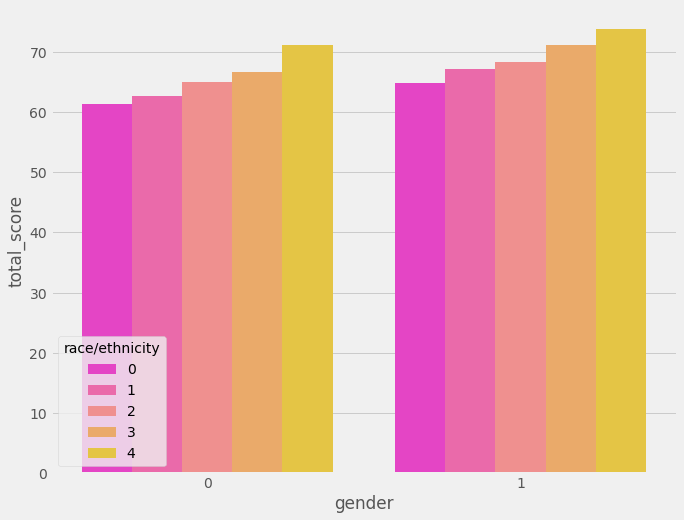

In [47]:
plt.figure(figsize=(10,8))
sns.barplot(x='gender',y='total_score',data=df,hue='race/ethnicity',ci=0,palette='spring')

Male and female of group E has the highest score while male and female of group A has the lowest total marks

<AxesSubplot:xlabel='gender', ylabel='total_score'>

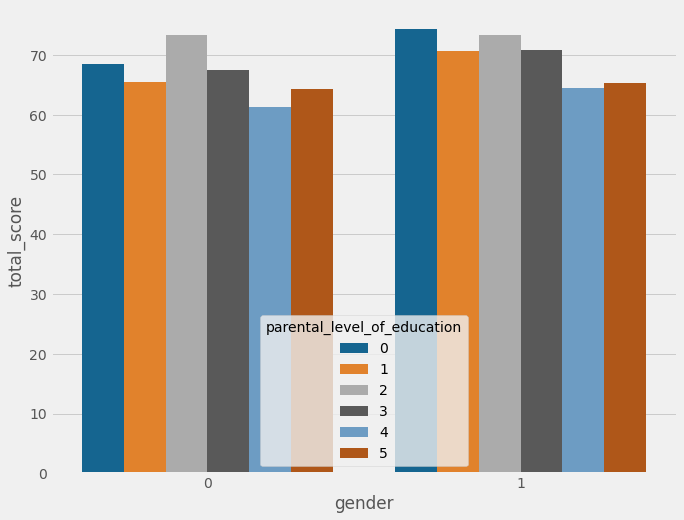

In [48]:
plt.figure(figsize=(10,8))
sns.barplot(x='gender',y='total_score',data=df,hue='parental_level_of_education',ci=0)

It can be found that a male with master's degree earned highest total_score while male in high school earned the least total_score. In second case, female with bachelor's degree highest total_score and female in high school earned least total_score

<AxesSubplot:xlabel='test_preparation_course', ylabel='total_score'>

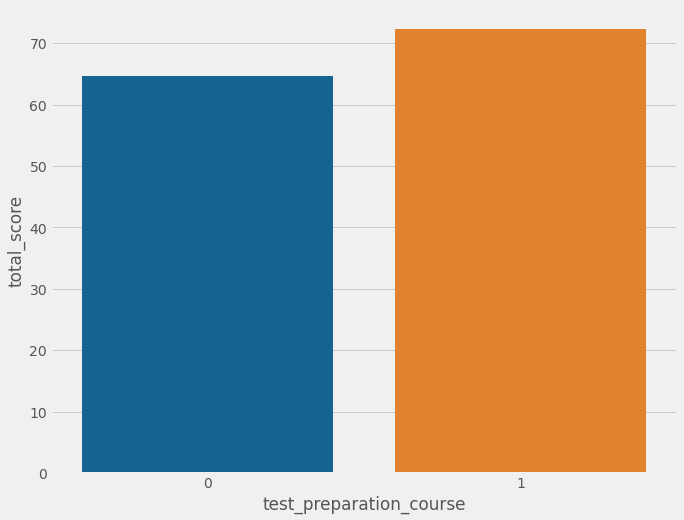

In [49]:
plt.figure(figsize=(10,8))
sns.barplot(x='test_preparation_course',y='total_score',data=df,ci=0)

It can be seen that students with complete preparation scored better as compared to without preparation

In [50]:
def func(x):
    if 0<x<40:
        return False
    else:
        return True

df['performance']=df['total_score'].apply(func)
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,performance
0,1,1,0,0,0,72,72,74,72,True
1,1,2,1,0,1,69,90,88,82,True
2,1,1,2,0,0,90,95,93,92,True
3,0,0,3,1,0,47,57,44,49,True
4,0,2,1,0,0,76,78,75,76,True


In [51]:
df.performance.value_counts()

True     970
False     30
Name: performance, dtype: int64

Hence it can be seen that in total combined average score 30 students failed the exam while 970 students have passed the exam

In [52]:
def func(x):
    if x>90:
        return 'A+'
    elif 80<x<=90:
        return 'A'
    elif 70<x<=80:
        return 'A-'
    elif 60<x<=70:
        return 'B+'
    elif 50<x<=60:
        return 'B'
    elif 40<=x<=50:
        return 'B-'
    else:
        return 'Fail'
df['grade']=df['total_score'].apply(func)
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,performance,grade
0,1,1,0,0,0,72,72,74,72,True,A-
1,1,2,1,0,1,69,90,88,82,True,A
2,1,1,2,0,0,90,95,93,92,True,A+
3,0,0,3,1,0,47,57,44,49,True,B-
4,0,2,1,0,0,76,78,75,76,True,A-


In [53]:
df.grade.value_counts()

B+      258
A-      255
B       188
A       133
B-       90
A+       46
Fail     30
Name: grade, dtype: int64

Above shows the description of the grades obtained by different students

### Splitting the data & Creating the model Linear Regression

In [54]:
x=df[['gender','race/ethnicity','parental_level_of_education','lunch','test_preparation_course','math_score','reading_score','writing_score']]
y=df['total_score']

In [55]:
x.shape,y.shape

((1000, 8), (1000,))

In [56]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(700, 8) (700,)
(300, 8) (300,)


In [57]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

### Prediction

In [58]:
prediction=model.predict(x_test)

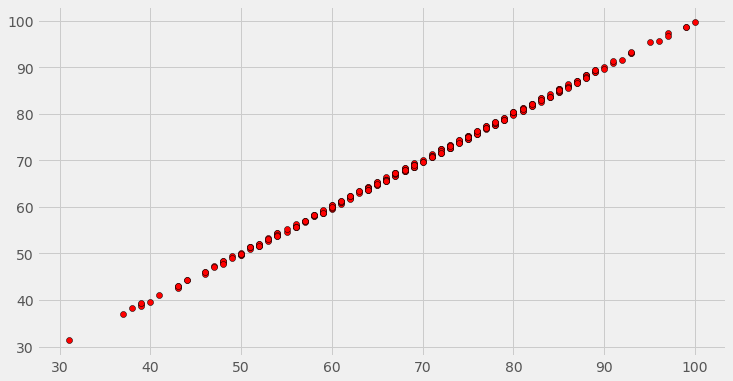

In [59]:
plt.figure(figsize=(11,6))
plt.scatter(y_test,prediction,edgecolors='black',c='red',vmin=30,vmax=70)

### Model Evaluation

In [60]:
from sklearn import metrics
mean_sq=metrics.mean_squared_error(y_test,prediction)
RMSE=np.sqrt(mean_sq)
RMSE

0.26609685357627083

Lower the root mean square error better is the model as the difference between the true value and predicted value decreases which leads to better output prediction

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.9996204135388175

Higher the r2 score better is the model and here it is 0.9 which is closer the 1 hence the model predicted the most of the values correctly